# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
fraud.shape

(1000000, 8)

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

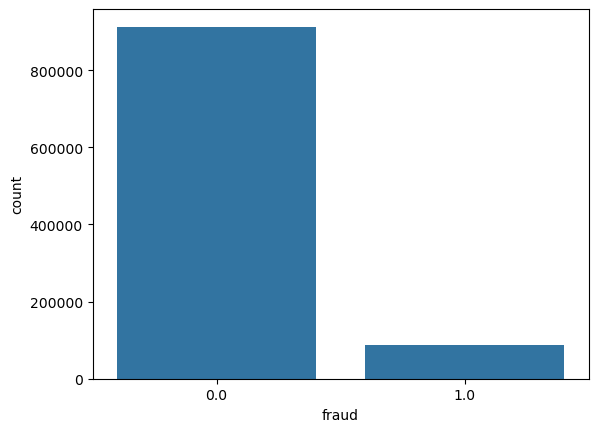

In [ ]:
#1
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=fraud, x="fraud")
plt.show()

In [10]:
#2
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [11]:
fraud['fraud'] = fraud['fraud'].astype(int)

In [13]:
features = fraud.drop(columns=['fraud'])
target = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
log_reg.score(X_test_scaled, y_test)

0.958584

In [ ]:
#3
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    228083
           1       0.89      0.60      0.72     21917

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [22]:
#4
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

train["fraud"] = y_train.values

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

train_over = pd.concat([fraud_oversampled, no_fraud])

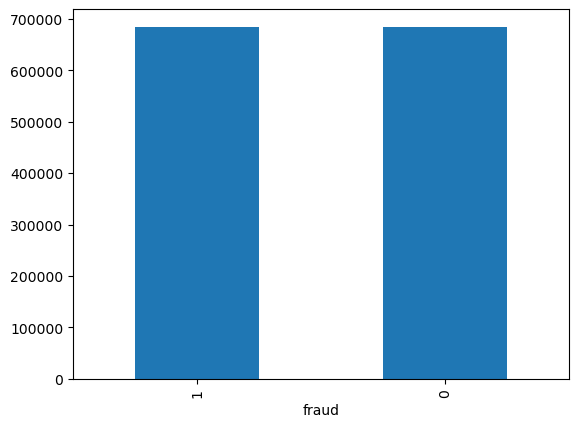

In [21]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [24]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228083
           1       0.58      0.95      0.72     21917

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [29]:
#5
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)

train_under = pd.concat([no_fraud_undersampled, fraud])

X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [30]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228083
           1       0.58      0.95      0.72     21917

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [31]:
#so far the best model
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [32]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    228083
           1       0.58      0.95      0.72     21917

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [33]:
adjusted_pred = [1 if tup[1] > 0.30 else 0 for tup in log_reg.predict_proba(X_test_scaled)]
print(classification_report(y_pred = adjusted_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    228083
           1       0.44      0.98      0.61     21917

    accuracy                           0.89    250000
   macro avg       0.72      0.93      0.77    250000
weighted avg       0.95      0.89      0.91    250000

